## Task-D: Collinear features and their effect on linear models

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('task_d.csv')

In [3]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [4]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

### `TASK1 : Logistic Regression `

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

alphas = np.logspace(-2, 1, 20).tolist()

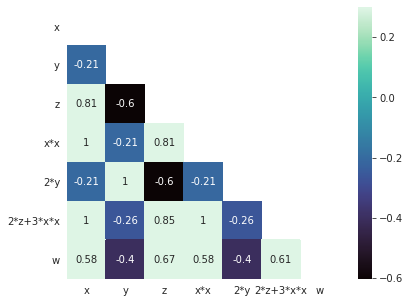

In [6]:
corr = data.drop(['target'], axis=1).corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, cmap='mako', annot=True)

In [7]:
LR = LogisticRegression(random_state=0)

parameters = {'C': alphas}

clf = GridSearchCV(LR, parameters, cv=5, scoring='accuracy')
clf = clf.fit(X, Y)

In [8]:
clf.best_params_, clf.best_score_, clf.best_estimator_

({'C': 0.01}, 1.0, LogisticRegression(C=0.01, random_state=0))

In [9]:
best_model = LogisticRegression(random_state=0, C=0.01, max_iter=10)
best_model.fit(X, Y)
pred = best_model.predict(X)

print(accuracy_score(Y, pred))

print("Best-Weights : ", best_model.coef_)

1.0
Best-Weights :  [[ 0.16985876 -0.18662565  0.25913329  0.16588976 -0.18662565  0.18058804
   0.15042411]]


In [10]:
# X_dash = X + e

noise = []
for i in range(X.shape[1]):
    noise.append(np.array([j*l for j in X[:,i] for l in np.random.uniform(1*10**-2, 9*10**-2, 1)]))

X_dash = np.array(noise).reshape(100, 7)

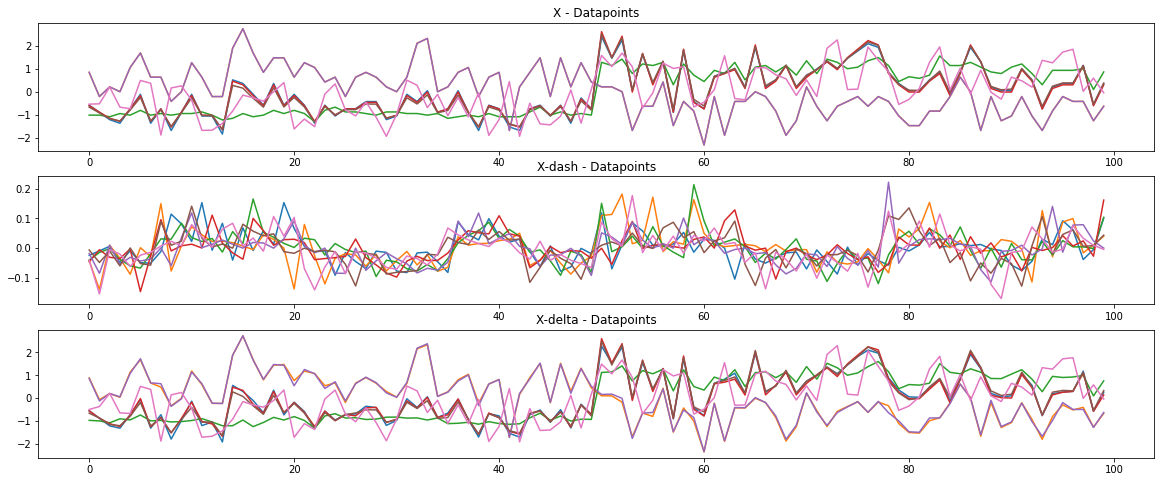

In [11]:
fig = plt.figure(figsize=(20,8))

plt.subplot(3, 1, 1);
plt.plot(X);
plt.title("X - Datapoints")

plt.subplot(3, 1, 2);
plt.plot(X_dash);
plt.title("X-dash - Datapoints")

plt.subplot(3, 1, 3);
plt.plot(np.subtract(X, X_dash));
plt.title("X-delta - Datapoints")

fig.show()

In [12]:
best_model_edited = LogisticRegression(C=0.01, random_state=0, max_iter=10)
best_model_edited.fit(X_dash, Y)
pred = best_model_edited.predict(X)

print(accuracy_score(Y, pred))

print("Best-Model-Weights : \n", best_model.coef_, "\n")
print("Best-Model-Edited-Weights : \n", best_model_edited.coef_)

0.4
Best-Model-Weights : 
 [[ 0.16985876 -0.18662565  0.25913329  0.16588976 -0.18662565  0.18058804
   0.15042411]] 

Best-Model-Edited-Weights : 
 [[-0.00114892  0.00963693  0.00171287  0.00204401  0.00385349  0.00291935
   0.00215612]]


In [13]:
print("Weight-Delta:")

top_4 = np.argsort(np.subtract(best_model.coef_, best_model_edited.coef_)).flatten().tolist()

print("Top4 Affected features : ", [list(data.columns)[i] for i in sorted(top_4, reverse=True)[:4]])

Weight-Delta:
Top4 Affected features :  ['w', '2*z+3*x*x', '2*y', 'x*x']


### `OBSERVATION : `

`1. Classifier overfits within 10 epochs, due to colinear features.`

`2. Weight-Delta clearly indicates, one features changes affects the colinear feature weights.`

`3. Top-4 Features are colinnear features.`


### `TASK2 : Linear SVM `

In [14]:
from sklearn.svm import LinearSVC

LR = LinearSVC(random_state=0)

parameters = {'C': alphas}

clf = GridSearchCV(LR, parameters, cv=5, scoring='accuracy')

clf = clf.fit(X, Y)

In [15]:
clf.best_params_, clf.best_score_, clf.best_estimator_

({'C': 0.01}, 1.0, LinearSVC(C=0.01, random_state=0))

In [16]:
best_model = LinearSVC(random_state=0, C=0.01, max_iter=10)
best_model.fit(X, Y)
pred = best_model.predict(X)

print(accuracy_score(Y, pred))

print("Best-Weights : ", best_model.coef_)

1.0
Best-Weights :  [[ 0.13229866 -0.17891499  0.29999505  0.12253074 -0.17891499  0.14649785
   0.10743375]]


In [17]:
# X_dash = X + e

noise = []
for i in range(X.shape[1]):
    noise.append(np.array([j*l for j in X[:,i] for l in np.random.uniform(1*10**-2, 9*10**-2, 1)]))

X_dash = np.array(noise).reshape(100, 7)

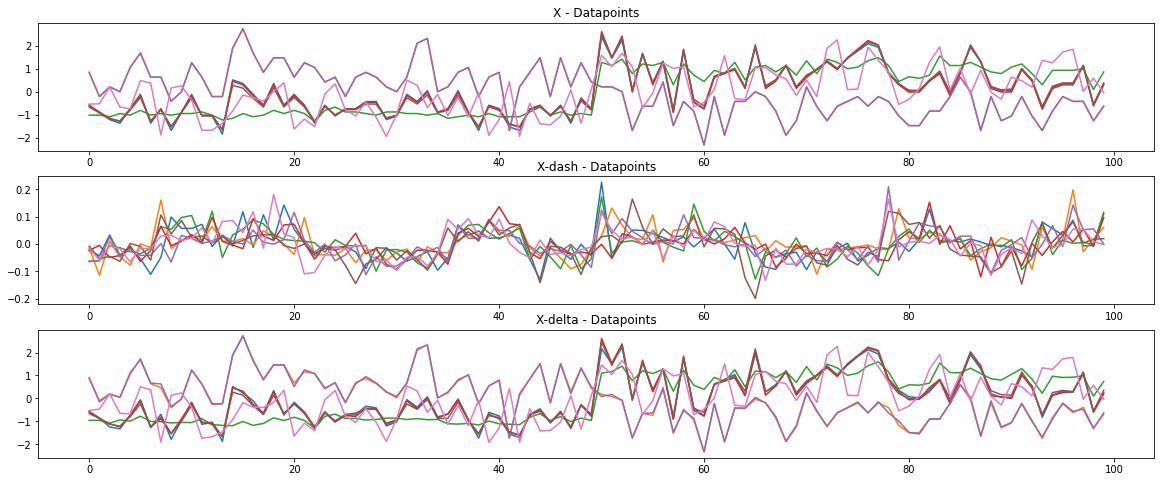

In [18]:
fig = plt.figure(figsize=(20,8))

plt.subplot(3, 1, 1);
plt.plot(X);
plt.title("X - Datapoints")

plt.subplot(3, 1, 2);
plt.plot(X_dash);
plt.title("X-dash - Datapoints")

plt.subplot(3, 1, 3);
plt.plot(np.subtract(X, X_dash));
plt.title("X-delta - Datapoints")

fig.show()

In [19]:
best_model_edited = LinearSVC(C=0.01, random_state=0, max_iter=10)
best_model_edited.fit(X_dash, Y)
pred = best_model_edited.predict(X)

print("Accuracy Score : ", accuracy_score(Y, pred), "\n")

print("Best-Model-Weights : \n", best_model.coef_, "\n")
print("Best-Model-Edited-Weights : \n", best_model_edited.coef_)

Accuracy Score :  0.32 

Best-Model-Weights : 
 [[ 0.13229866 -0.17891499  0.29999505  0.12253074 -0.17891499  0.14649785
   0.10743375]] 

Best-Model-Edited-Weights : 
 [[ 0.00884605  0.02191811 -0.00197535 -0.00238561  0.0201486   0.01031313
   0.00204918]]


In [20]:
print("Weight-Delta:")

top_4 = np.argsort(np.subtract(best_model.coef_, best_model_edited.coef_)).flatten().tolist()

print("Top4 Affected features : ", [list(data.columns)[i] for i in sorted(top_4, reverse=True)[:4]])

Weight-Delta:
Top4 Affected features :  ['w', '2*z+3*x*x', '2*y', 'x*x']


### `OBSERVATION : `

`1. Classifier overfits within 10 epochs, due to colinear features.`

`2. Weight-Delta clearly indicates, independent features changes affects the corresponding colinear feature weights.`

`3. After introduced noise onto dataset, the Top-4 affected features are colinear features.`